# Forecast population density growth of regions in Finland

Data source: Statistic Finland

Table: 12f8 -- 10. All data groups by municipality, 2010-2021

Link: https://pxdata.stat.fi/PxWeb/pxweb/en/Postinumeroalueittainen_avoin_tieto/Postinumeroalueittainen_avoin_tieto__uusin/paavo_pxt_12f8.px/

In [1]:
import pandas as pd
import numpy as np

## Process raw data

In [2]:
# Create the base with region column DataFrame
area_values = [f"MK{idx:02d}" for idx in np.arange(1, 22) if idx != 3 and idx != 20]

base_df = pd.DataFrame({"Region": area_values})
base_df

,Region
0,MK01
1,MK02
2,MK04
3,MK05
4,MK06
5,MK07
6,MK08
7,MK09
8,MK10
9,MK11


In [3]:
# load regional area (km2) data
# data source: https://www.statista.com/statistics/526998/total-area-of-finland-by-region/

# Given data as a list of tuples
data = [
    ("Lapland", 92683.24),
    ("North Ostrobothnia", 36830.22),
    ("Kainuu", 20198.17),
    ("North Karelia", 18793.14),
    ("North Savo", 17345.53),
    ("Central Finland", 16042.57),
    ("South Ostrobothnia", 13798.45),
    ("Pirkanmaa", 13249.22),
    ("South Savo", 12651.95),
    ("Southwest Finland", 10667.89),
    ("Uusimaa", 9102.75),
    ("Satakunta", 7822.97),
    ("Ostrobothnia", 7402.91),
    ("Päijät-Häme", 5714.65),
    ("South Karelia", 5326.37),
    ("Kanta-Häme", 5199.25),
    ("Central Ostrobothnia", 5020.44),
    ("Kymenlaakso", 4559.38),
    ("Åland", 1554.18)
]

area = pd.DataFrame(data, columns=["Region Name", "Area (km2)"])
area


,Region Name,Area (km2)
0,Lapland,92683.24
1,North Ostrobothnia,36830.22
2,Kainuu,20198.17
3,North Karelia,18793.14
4,North Savo,17345.53
5,Central Finland,16042.57
6,South Ostrobothnia,13798.45
7,Pirkanmaa,13249.22
8,South Savo,12651.95
9,Southwest Finland,10667.89


In [4]:
# create a dictionary of region english-finnish names
region_name_map = pd.read_csv('../data/region_city_data/municipality_region_map.csv')
region_name_map = region_name_map[['Name of region in English','Name of region in Finnish', 'Code of region']]
region_name_map.drop_duplicates(inplace=True)

# create column MKxx where xx is value from Code of region column
region_name_map['Code of region'] = region_name_map['Code of region'].apply(lambda x: f'MK{x:02d}')
region_name_map.sort_values(by='Code of region', inplace=True)
region_name_map.reset_index(drop=True, inplace=True)
region_name_map

,Name of region in English,Name of region in Finnish,Code of region
0,Uusimaa,Uusimaa,MK01
1,Southwest Finland,Varsinais-Suomi,MK02
2,Satakunta,Satakunta,MK04
3,Kanta-Häme,Kanta-Häme,MK05
4,Pirkanmaa,Pirkanmaa,MK06
5,Päijät-Häme,Päijät-Häme,MK07
6,Kymenlaakso,Kymenlaakso,MK08
7,South Karelia,Etelä-Karjala,MK09
8,South Savo,Etelä-Savo,MK10
9,North Savo,Pohjois-Savo,MK11


In [5]:
# merge area_df and region_name_map
area_df = pd.merge(area, region_name_map, left_on='Region Name', right_on='Name of region in English', how='left')

# merge base_df and area_df
df = pd.merge(base_df, area_df, left_on='Region', right_on='Code of region', how='left')
df = df[['Region', 'Name of region in English', 'Name of region in Finnish', 'Area (km2)']]
df.columns = ['Region code', 'Region name (en)', 'Region name (fi)', 'Area (km2)']
df

,Region code,Region name (en),Region name (fi),Area (km2)
0,MK01,Uusimaa,Uusimaa,9102.75
1,MK02,Southwest Finland,Varsinais-Suomi,10667.89
2,MK04,Satakunta,Satakunta,7822.97
3,MK05,Kanta-Häme,Kanta-Häme,5199.25
4,MK06,Pirkanmaa,Pirkanmaa,13249.22
5,MK07,Päijät-Häme,Päijät-Häme,5714.65
6,MK08,Kymenlaakso,Kymenlaakso,4559.38
7,MK09,South Karelia,Etelä-Karjala,5326.37
8,MK10,South Savo,Etelä-Savo,12651.95
9,MK11,North Savo,Pohjois-Savo,17345.53


In [6]:
# Load population data by region, from 2017 to 2021
regional_df = pd.read_csv('./../data/region_city_data/region_info_2011_2021.csv')
regional_df = regional_df[['Region', 'Information', '2017', '2018', '2019', '2020', '2021']]
regional_df = regional_df[regional_df['Information'] == 'Inhabitants, total (HE)'].copy()
regional_df.drop(columns=['Information'], inplace=True)
regional_df['Region code'] = regional_df['Region'].apply(lambda x: x[:4])
regional_df.drop(columns=['Region'], inplace=True)
regional_df = regional_df.set_index('Region code').stack()

regional_df = pd.DataFrame(regional_df)
regional_df.reset_index(inplace=True)
regional_df.columns = ['Region code', 'Year', 'Population']
regional_df

,Region code,Year,Population
0,MK01,2017,1655624.0
1,MK01,2018,1671024.0
2,MK01,2019,1689725.0
3,MK01,2020,1702678.0
4,MK01,2021,1714741.0
...,...,...,...
90,MK21,2017,29489.0
91,MK21,2018,29789.0
92,MK21,2019,29884.0
93,MK21,2020,30129.0


In [7]:
# Calculate population density
df = pd.merge(df, regional_df, on='Region code', how='left')
df['Population Density'] = df['Population'] / df['Area (km2)']

df

,Region code,Region name (en),Region name (fi),Area (km2),Year,Population,Population Density
0,MK01,Uusimaa,Uusimaa,9102.75,2017,1655624.0,181.881739
1,MK01,Uusimaa,Uusimaa,9102.75,2018,1671024.0,183.573535
2,MK01,Uusimaa,Uusimaa,9102.75,2019,1689725.0,185.627970
3,MK01,Uusimaa,Uusimaa,9102.75,2020,1702678.0,187.050946
4,MK01,Uusimaa,Uusimaa,9102.75,2021,1714741.0,188.376150
...,...,...,...,...,...,...,...
90,MK21,Åland,Ahvenanmaa,1554.18,2017,29489.0,18.973993
91,MK21,Åland,Ahvenanmaa,1554.18,2018,29789.0,19.167021
92,MK21,Åland,Ahvenanmaa,1554.18,2019,29884.0,19.228146
93,MK21,Åland,Ahvenanmaa,1554.18,2020,30129.0,19.385785


In [8]:
DATA = df.copy()
DATA

,Region code,Region name (en),Region name (fi),Area (km2),Year,Population,Population Density
0,MK01,Uusimaa,Uusimaa,9102.75,2017,1655624.0,181.881739
1,MK01,Uusimaa,Uusimaa,9102.75,2018,1671024.0,183.573535
2,MK01,Uusimaa,Uusimaa,9102.75,2019,1689725.0,185.627970
3,MK01,Uusimaa,Uusimaa,9102.75,2020,1702678.0,187.050946
4,MK01,Uusimaa,Uusimaa,9102.75,2021,1714741.0,188.376150
...,...,...,...,...,...,...,...
90,MK21,Åland,Ahvenanmaa,1554.18,2017,29489.0,18.973993
91,MK21,Åland,Ahvenanmaa,1554.18,2018,29789.0,19.167021
92,MK21,Åland,Ahvenanmaa,1554.18,2019,29884.0,19.228146
93,MK21,Åland,Ahvenanmaa,1554.18,2020,30129.0,19.385785


## Visualizing for all regions

In [9]:
DATA

,Region code,Region name (en),Region name (fi),Area (km2),Year,Population,Population Density
0,MK01,Uusimaa,Uusimaa,9102.75,2017,1655624.0,181.881739
1,MK01,Uusimaa,Uusimaa,9102.75,2018,1671024.0,183.573535
2,MK01,Uusimaa,Uusimaa,9102.75,2019,1689725.0,185.627970
3,MK01,Uusimaa,Uusimaa,9102.75,2020,1702678.0,187.050946
4,MK01,Uusimaa,Uusimaa,9102.75,2021,1714741.0,188.376150
...,...,...,...,...,...,...,...
90,MK21,Åland,Ahvenanmaa,1554.18,2017,29489.0,18.973993
91,MK21,Åland,Ahvenanmaa,1554.18,2018,29789.0,19.167021
92,MK21,Åland,Ahvenanmaa,1554.18,2019,29884.0,19.228146
93,MK21,Åland,Ahvenanmaa,1554.18,2020,30129.0,19.385785


In [10]:
import matplotlib.pyplot as plt

In [11]:
# functions to get dataframes for each region 
def get_region_data(region_code, df):
    """Return dataframe with region code, year."""
    df_region = df[df['Region code'] == region_code].copy()
    df_region = df_region[['Year', 'Population Density']].copy()
    df_region.set_index('Year', inplace=True)
    return df_region

def visualize_all_regions():
    df = DATA.copy()
    fig, axes = plt.subplots(5, 4, figsize=(20, 20))
    axes = axes.flatten()
    for i, region in enumerate(df['Region code'].unique()):
        df_region = get_region_data(region, df)
        df_region.plot(ax=axes[i], legend=False)
        axes[i].set_title(region)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Population Density')
    plt.tight_layout()
    plt.show()

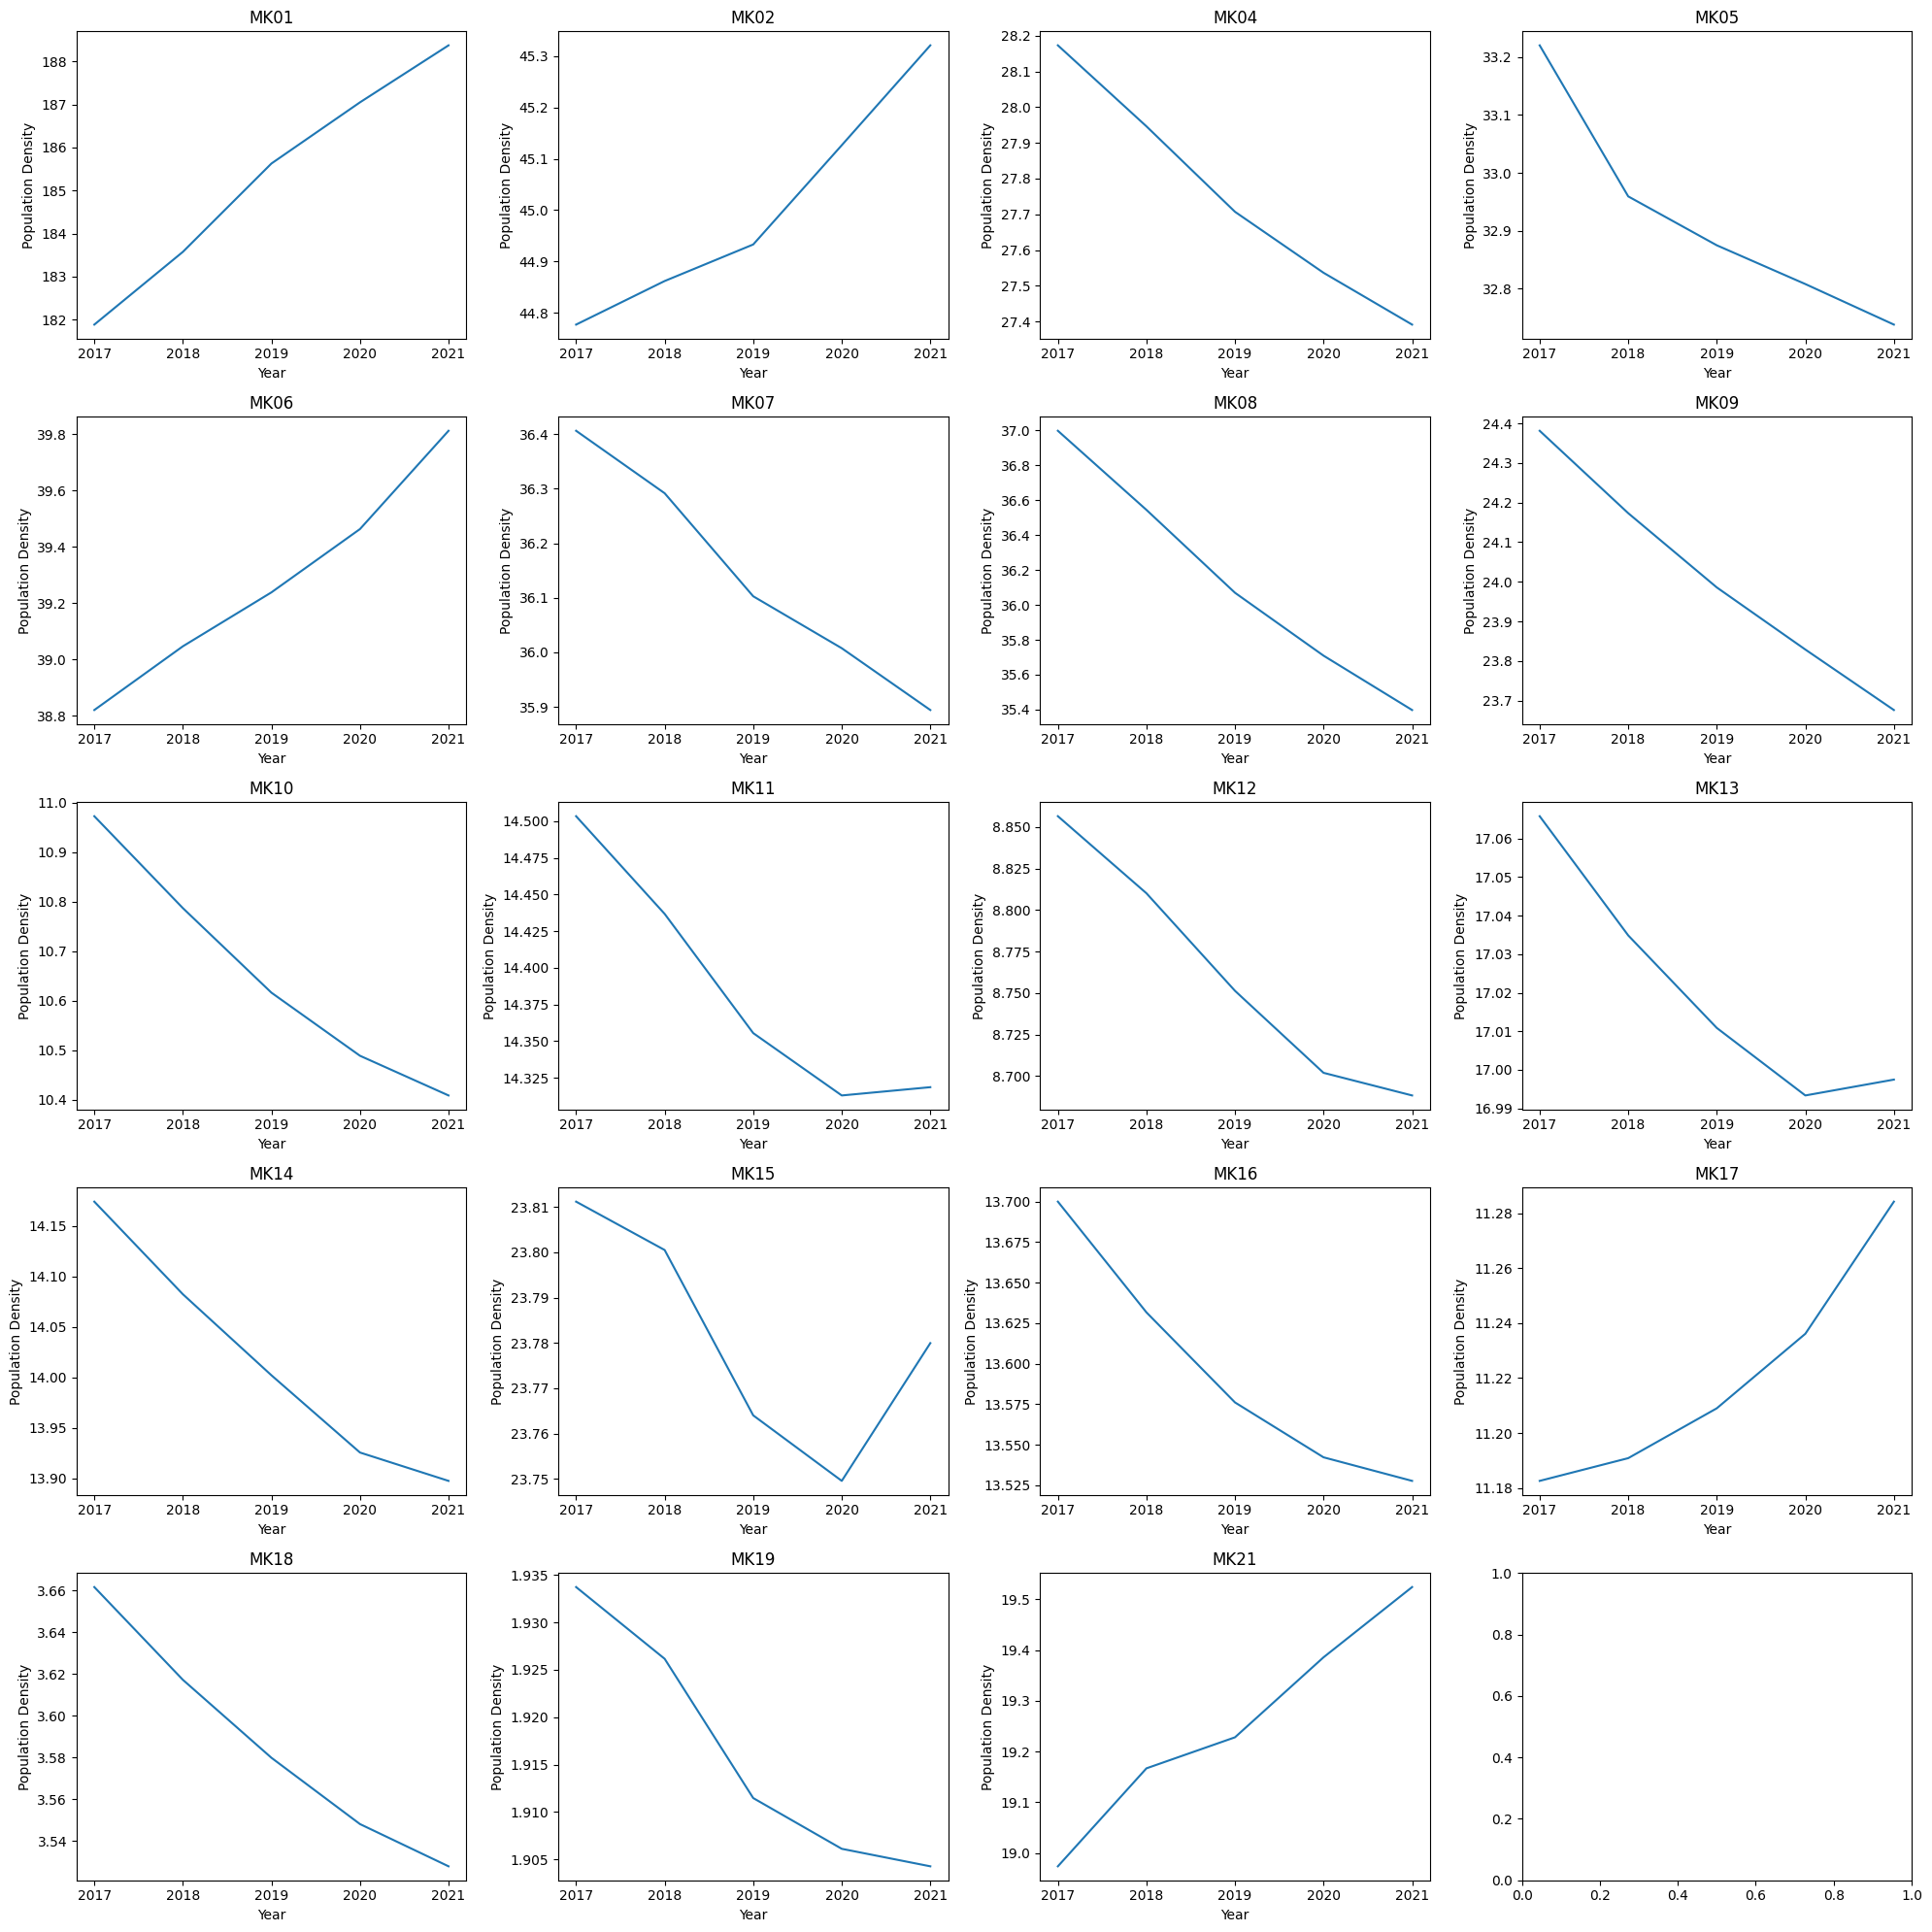

In [12]:
visualize_all_regions()

## ARIMA model

In [13]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def get_future_forecast_df(forecast_df, future_years, region):
    future_forecast_df = forecast_df[forecast_df['Year'].isin(future_years)].copy()
    future_forecast_df = future_forecast_df[['Year', 'Forecast']].copy()
    future_forecast_df.columns = ['Year', region]
    return future_forecast_df


def report_region_data(region, df, ax, dfs):
    '''Create and visualize forecast of the population density in the given region with ARIMA'''

    # Get the region's data
    df_region = get_region_data(region_code=region, df=df)
    df_region.reset_index(inplace=True)
    df_region['Year'] = df_region['Year'].astype(int)

    # Split the data into a train and test set
    train_data = df_region.copy()

    # Find the best ARIMA model automatically
    model = auto_arima(train_data['Population Density'],
                       start_p=0,
                       start_q=0,
                       max_p=5,
                       max_q=5,
                    #    trace=True,
                       seasonal=False,
                       stationary=False)

    model.fit(train_data['Population Density'])

    # Forecast for the training and test data
    train_forecast = model.predict_in_sample()

    # Calculate the training and testing error (Mean Absolute Error, MAE)
    train_data['Forecast'] = train_forecast
    train_mae = mean_absolute_error(train_data['Population Density'], train_forecast)

    # Forecast for the next 3 years outside the scope of data
    num_years_to_forecast = 3
    last_year = df_region['Year'].max()
    forecast_years = np.arange(last_year + 1, last_year + num_years_to_forecast + 1)
    forecast_df = pd.DataFrame({'Year': forecast_years})
    forecast, conf_int = model.predict(n_periods=len(forecast_df), return_conf_int=True)
    forecast.index = range(len(forecast))
    forecast_df['Forecast'] = forecast

    # Save the future forecast of this region into the list of future forecasts for all regions
    future_forecast_df = get_future_forecast_df(forecast_df, forecast_years, region)
    dfs.append(future_forecast_df)

    # Plot the region's data on the subplot
    ax.plot(train_data['Year'], train_data['Population Density'], label='Train Data', marker='o', markersize=6, color='blue')

    # Plot the training and test forecasts
    ax.plot(train_data['Year'], train_data['Forecast'], label='Train Forecast', linestyle='dashed', color='red')
    ax.plot(forecast_df['Year'], forecast_df['Forecast'], label='Future Forecast', linestyle='dashed', color='black')

    # Plot the confidence intervals for the forecasts
    cf = pd.DataFrame(conf_int)
    cf.index = forecast_df['Year']
    ax.fill_between(cf.index, cf[0], cf[1], color='grey', alpha=.3)

    # Set x-ticks for every year
    ax.set_xticks(range(train_data['Year'].min(), forecast_years[-1] + 1))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.set_title(f'Population density in {region} - Train error: {train_mae:.2f}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Population Density')

    # Annotate the test and forecast points
    forecast_years_to_annotate = forecast_df['Year'].iloc[-num_years_to_forecast:]
    forecast_values_to_annotate = forecast[-num_years_to_forecast:]
    for year, value in zip(forecast_years_to_annotate, forecast_values_to_annotate):
        ax.scatter(year, value, marker='o', color='black')
        ax.annotate(f'{value:.2f}', (year, value), textcoords="offset points", xytext=(0, 10), ha='center', color='black')

    ax.legend(loc='upper left')
    ax.grid(True)


def forecast_and_visualize_all_regions(func):
    '''Create a 5x4 plot of forecasts for each region using the given function'''
    dfs = []
    fig, axes = plt.subplots(5, 4, figsize=(30, 30))
    axes = axes.flatten()
    for i, region in enumerate(DATA['Region code'].unique()):
        func(region, DATA, axes[i], dfs)
    plt.tight_layout()
    plt.show()

    return dfs


def future_forecast_all_regions(dfs):
    '''Create a DataFrame with the future forecasts of all regions'''
    df = pd.DataFrame({'Year': dfs[0]['Year']})
    for region in dfs:
        df = pd.merge(df, region, on='Year', how='inner')
    return df

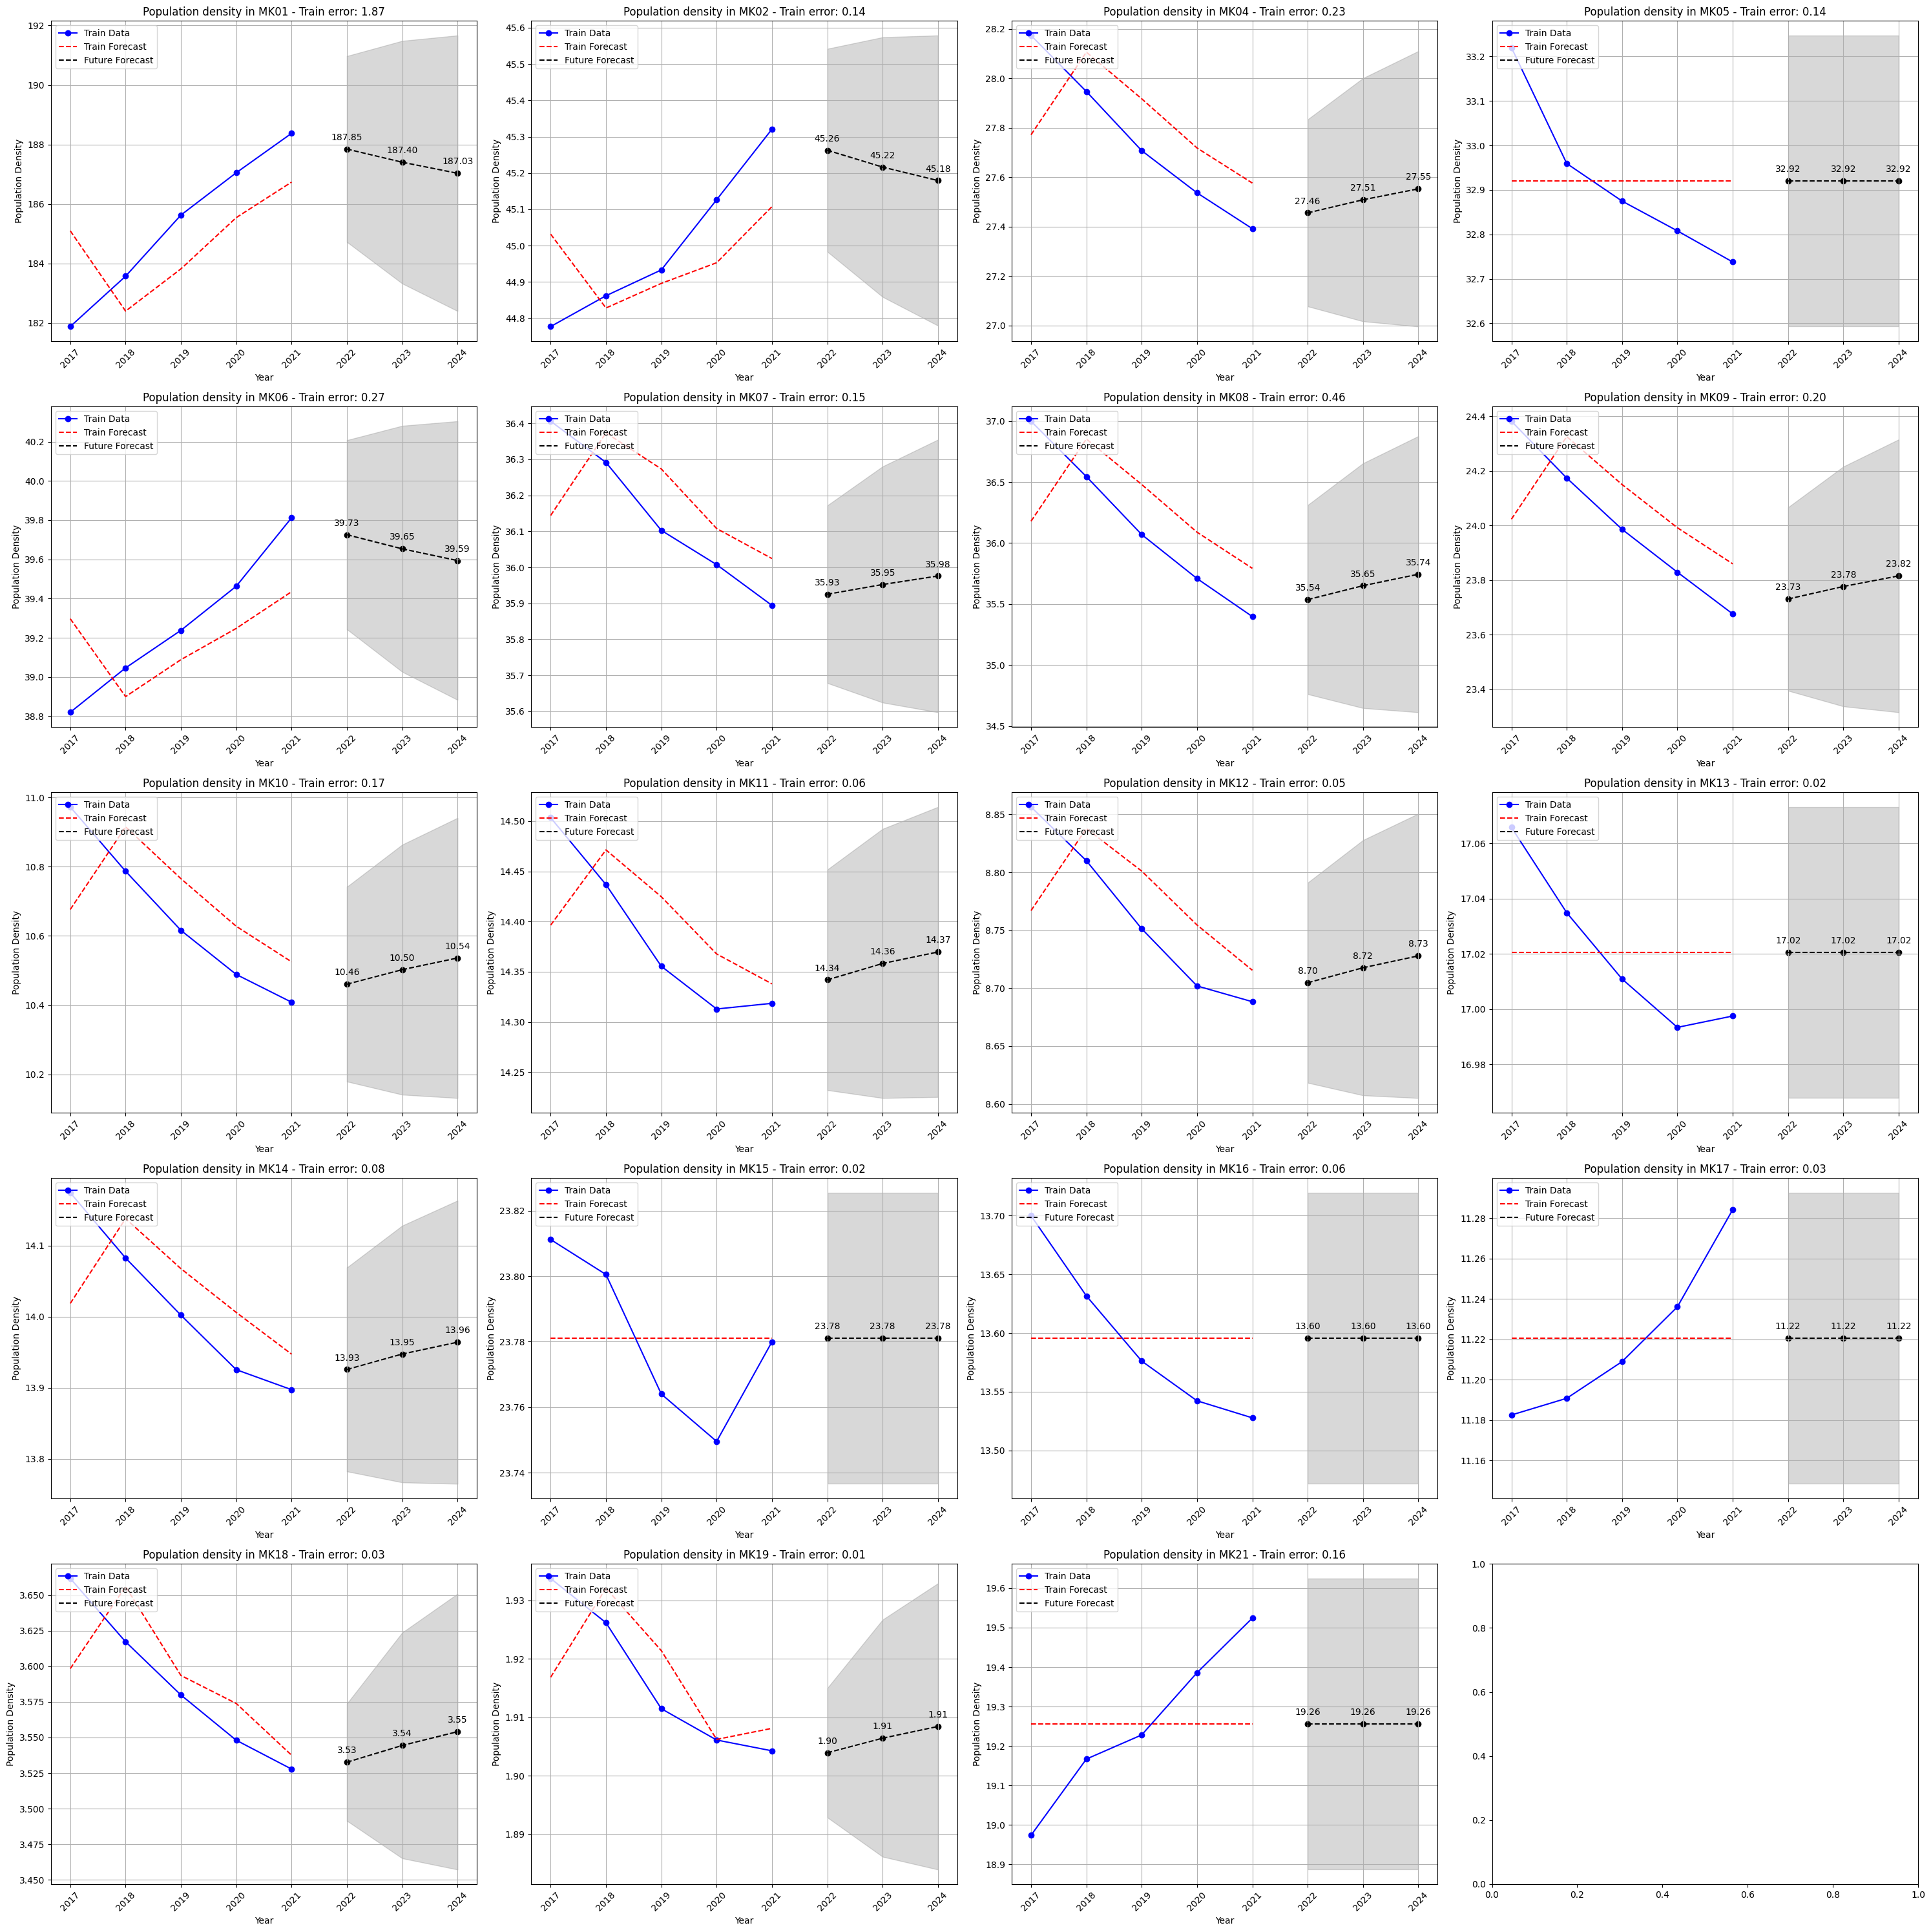

,Year,MK01,MK02,MK04,MK05,MK06,MK07,MK08,MK09,MK10,MK11,MK12,MK13,MK14,MK15,MK16,MK17,MK18,MK19,MK21
0,2022,187.848015,45.262716,27.455145,32.920094,39.725594,35.925303,35.536439,23.730545,10.460523,14.341900,8.704693,17.020465,13.925728,23.781054,13.595541,11.220568,3.532608,1.903935,19.255813
1,2023,187.404989,45.216318,27.508291,32.920094,39.653685,35.952375,35.650627,23.776531,10.502430,14.358244,8.717653,17.020465,13.947459,23.781054,13.595541,11.220568,3.544393,1.906423,19.255813
2,2024,187.033355,45.179237,27.552503,32.920094,39.593843,35.976099,35.744525,23.815282,10.536198,14.369688,8.727916,17.020465,13.964107,23.781054,13.595541,11.220568,3.554066,1.908432,19.255813


In [14]:
# Forecast + visualize all regions population density
density_all = forecast_and_visualize_all_regions(report_region_data)

density_all = future_forecast_all_regions(density_all)
density_all

In [56]:
density_all.to_csv('../data/forecast_values/population_density.csv', index=False)